# Handgrip strengh analysis

### Import necessary libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
!pip freeze > requirements.txt

### Loading Datasets

In [11]:
data = pd.read_csv("dataset.csv")

The examples of train data:

In [12]:
data.head()

,id,gender,age,dynamometer(kg),strength level,left-light,mid-light,right-light,size,length,width,hand-size
0,1,male,24,29.80,weak,255.82710,345.155357,282.110000,152.88,18.2,8.4,152.88
1,3,male,28,49.45,normal,707.56250,444.132261,132.351578,164.43,18.9,8.7,164.43
2,4,female,31,14.50,weak,378.24840,418.451900,321.544776,122.50,17.5,7.0,122.50
3,5,male,35,30.80,weak,299.69645,174.567718,184.069000,140.80,17.6,8.0,140.80
4,6,female,23,21.30,weak,436.84720,89.388895,118.972000,161.50,19.0,8.5,161.50


## EDA

### Missing values

Firstly, I have checked the null/missing values in the train and validation datasets. From the results, I can say that there is no missing value in the datasets.

In [13]:
count = data.isnull().sum()
precentage = data.isnull().mean().round(4) * 100

print("Train Dataset-------------------------------")
pd.DataFrame({'count': count, 'precentage': precentage}).sort_values('count', ascending=False)

Train Dataset-------------------------------


,count,precentage
id,0,0.0
gender,0,0.0
age,0,0.0
dynamometer(kg),0,0.0
strength level,0,0.0
left-light,0,0.0
mid-light,0,0.0
right-light,0,0.0
size,0,0.0
length,0,0.0


### Digitize the features

In [14]:
label_encoder = LabelEncoder()
data['digitize_gender'] = label_encoder.fit_transform(data['gender'])
data['digitize_strength_level'] = data['strength level'].apply(lambda x: 1 if x=='normal' else 0)#label_encoder.fit_transform(data['strength level'])
data.sample(5)

,id,gender,age,dynamometer(kg),strength level,left-light,mid-light,right-light,size,length,width,hand-size,digitize_gender,digitize_strength_level
22,26,female,27,28.15,normal,601.820000,117.840000,106.300000,147.00,17.5,8.4,147.00,0,1
7,9,female,25,19.35,weak,527.054100,197.942865,267.893900,127.28,17.2,7.4,127.28,0,0
23,27,male,35,45.50,normal,711.015000,350.559333,213.076667,173.55,19.5,8.9,173.55,1,1
17,20,female,32,20.40,weak,583.034579,468.915216,182.400000,116.64,16.2,7.2,116.64,0,0
14,17,male,27,38.10,normal,542.407143,285.694535,100.934524,153.34,18.7,8.2,153.34,1,1


### Class Distribution

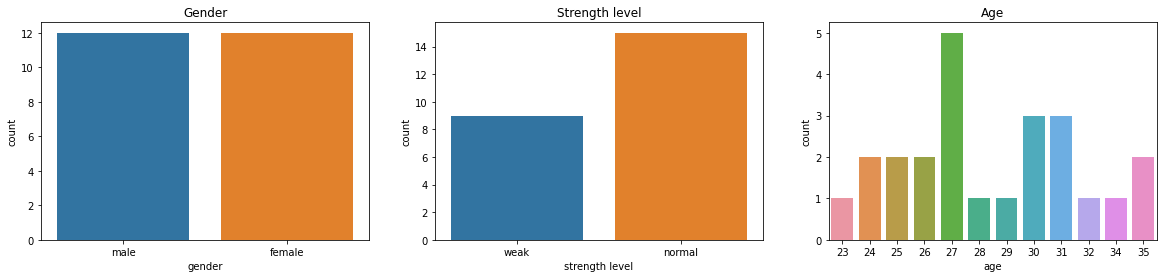

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
sns.countplot(x='gender', data=data, ax=ax1)
sns.countplot(x='strength level', data=data, ax=ax2)
sns.countplot(x='age', data=data, ax=ax3)


ax1.set_title('Gender')
ax2.set_title('Strength level')
ax3.set_title('Age')

plt.show()

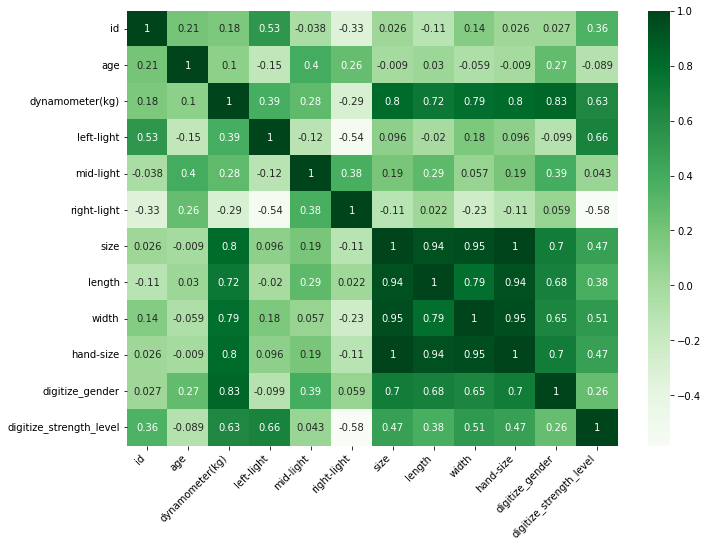

In [16]:
corr = data.corr()
plt.figure(figsize=(11,8))
ax = sns.heatmap(corr, cmap="Greens",annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

# Feature importances

## Functions

In [19]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import seaborn as sns

In [20]:
from IPython.core.pylabtools import figsize
def calculate_feature_importance(model, features, label, model_name='LogisticRegression'):
  X = data[features].values
  y = data[label].values

  model.fit(X, y)
  pred = model.predict(X)
  # print(pred)
  y_pred = pred #> 0.51


  print(f'Accuracy score is {accuracy_score(y, y_pred)}')
  print(f'{classification_report(y, y_pred)}')


  fig, axs = plt.subplots(2, figsize=(6, 12))
  x_ax = list(range(0, len(X)))
  # print(X.shape)
  sns.scatterplot(x_ax, X.flatten(), hue=y_pred, ax=axs[0])
  sns.scatterplot(x_ax, X.flatten(), hue=y.flatten(), ax=axs[1])


  axs[0].set_title(f"{model_name} - Relation between {features[0]} and Strength Level")
  axs[0].set_ylabel(f'{features[0]}')
  axs[0].set_xlabel(f'')
  
  axs[1].set_title(f"Actual Relation between {features[0]} and Strength Level")
  axs[1].set_ylabel(f'{features[0]}')
  axs[1].set_xlabel(f'')
  
  plt.show()

## Logistic Regression

I have experimented LogisticRegression ML model  and my feature is **‘left-light’** sensor on the finger. 

 Trained model can predict strength level of the input feature with **83.33%** accuracy.

From the graph, we can see that if the left-light sensor value is **more than approximately 500 then model can predict that the person’s strength level is normal, otherwise the strength level is weak.**


Accuracy score is 0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.82      0.93      0.87        15

    accuracy                           0.83        24
   macro avg       0.84      0.80      0.81        24
weighted avg       0.84      0.83      0.83        24



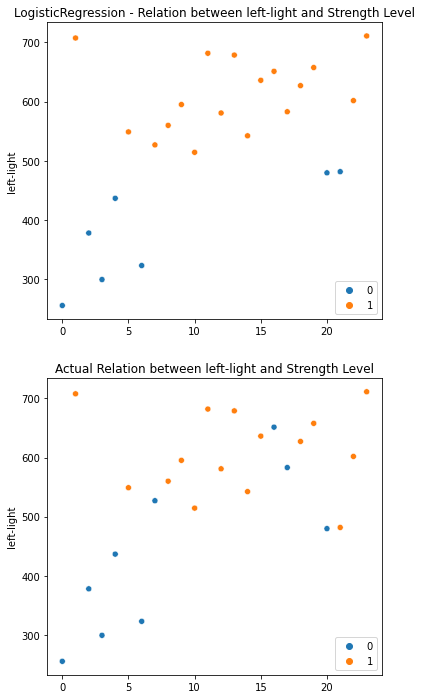

In [21]:
features = ['left-light']
label = ['digitize_strength_level']
model = LogisticRegression()
calculate_feature_importance(model, features, label)

I have experimented LogisticRegression ML model  and my feature is **‘mid-light’** sensor on the finger. 

 Trained model can predict strength level of the input feature with **62.5%** accuracy.

From the graph, we can see that the mid-light sensor value is not important feature for measuring strength level.

If we look f1-score for each unique prediction value, we see that model predicted all weak class as incorrectly.


Accuracy score is 0.625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.62      1.00      0.77        15

    accuracy                           0.62        24
   macro avg       0.31      0.50      0.38        24
weighted avg       0.39      0.62      0.48        24



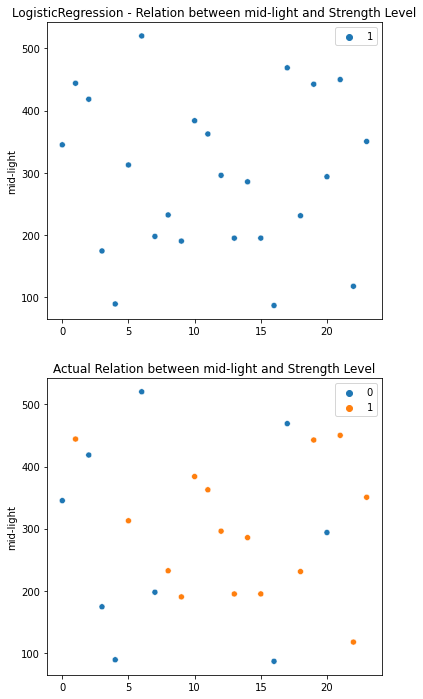

In [22]:
features = ['mid-light']
label = ['digitize_strength_level']
model = LogisticRegression()
calculate_feature_importance(model, features, label)

I have experimented LogisticRegression ML model  and my feature is **‘right-light’** sensor on the finger. 

 Trained model can predict strength level of the input feature with **70.83%** accuracy.

From the graph, we can see that **if the right-light sensor value is smaller than approximately 200 then model can predict that the person’s strength level is normal, otherwise the strength level is weak.**


Accuracy score is 0.7083333333333334
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.75      0.80      0.77        15

    accuracy                           0.71        24
   macro avg       0.69      0.68      0.68        24
weighted avg       0.70      0.71      0.70        24



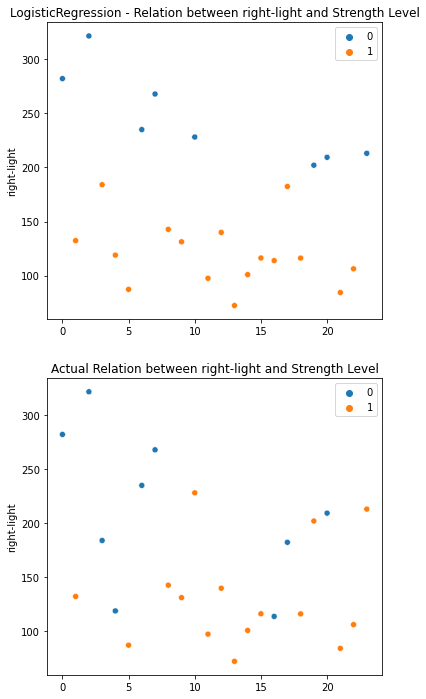

In [23]:
features = ['right-light']
label = ['digitize_strength_level']
model = LogisticRegression()
calculate_feature_importance(model, features, label)

## KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy score is 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.79      1.00      0.88        15

    accuracy                           0.83        24
   macro avg       0.89      0.78      0.80        24
weighted avg       0.87      0.83      0.82        24



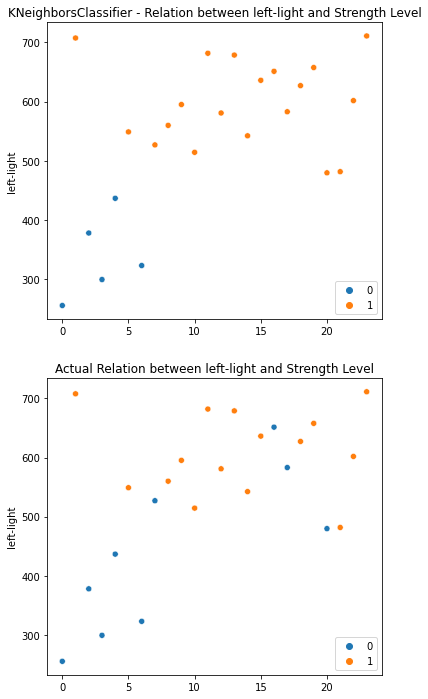

In [25]:
features = ['left-light']
label = ['digitize_strength_level']
neigh = KNeighborsClassifier(n_neighbors=3)
calculate_feature_importance(neigh, features, label, model_name='KNeighborsClassifier')

Accuracy score is 0.7083333333333334
              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.70      0.93      0.80        15

    accuracy                           0.71        24
   macro avg       0.72      0.63      0.63        24
weighted avg       0.72      0.71      0.67        24



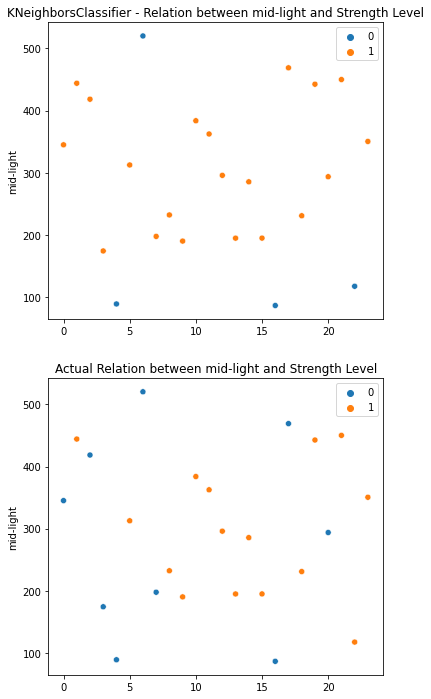

In [26]:
features = ['mid-light']
label = ['digitize_strength_level']
neigh = KNeighborsClassifier(n_neighbors=3)
calculate_feature_importance(neigh, features, label, model_name='KNeighborsClassifier')

Accuracy score is 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.79      1.00      0.88        15

    accuracy                           0.83        24
   macro avg       0.89      0.78      0.80        24
weighted avg       0.87      0.83      0.82        24



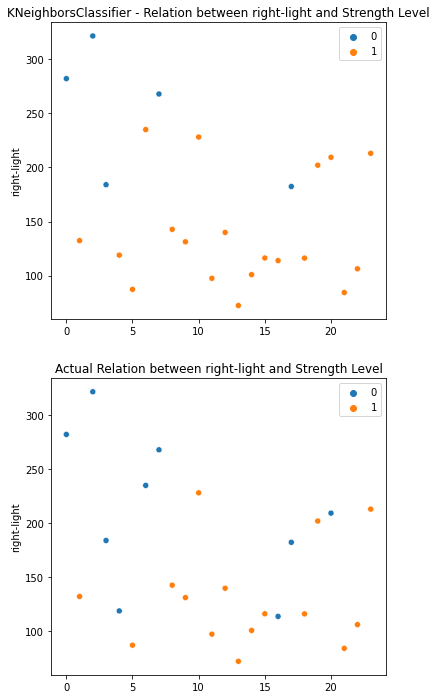

In [27]:
features = ['right-light']
label = ['digitize_strength_level']
neigh = KNeighborsClassifier(n_neighbors=3)
calculate_feature_importance(neigh, features, label, model_name='KNeighborsClassifier')

## RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

I have experimented **RandomForestClassifier** ML model  and my feature is **‘left-light’** sensor on the finger. 

 Trained model can predict strength level of the input feature with **87.5%** accuracy.

From the graph, we can see that **if the left-light sensor value is more than approximately 500 then model can predict that the person’s strength level is normal, otherwise the strength level is weak.**


Accuracy score is 0.875
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.83      1.00      0.91        15

    accuracy                           0.88        24
   macro avg       0.92      0.83      0.85        24
weighted avg       0.90      0.88      0.87        24



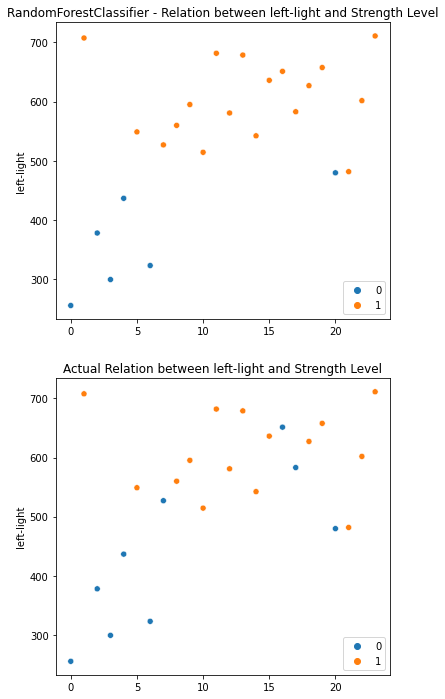

In [29]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
features = ['left-light']
label = ['digitize_strength_level']
calculate_feature_importance(clf, features, label, model_name='RandomForestClassifier')

My experimented feature is **‘mid-light’** sensor on the finger. 

Trained model can predict strength level of the input with **79.2%** accuracy.

We see that the accuracy is increased and precision, recall, f1-score has changed positively.

So, applying Random Forest Classifier to this feature is more relevant.


Accuracy score is 0.7916666666666666
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.75      1.00      0.86        15

    accuracy                           0.79        24
   macro avg       0.88      0.72      0.74        24
weighted avg       0.84      0.79      0.77        24



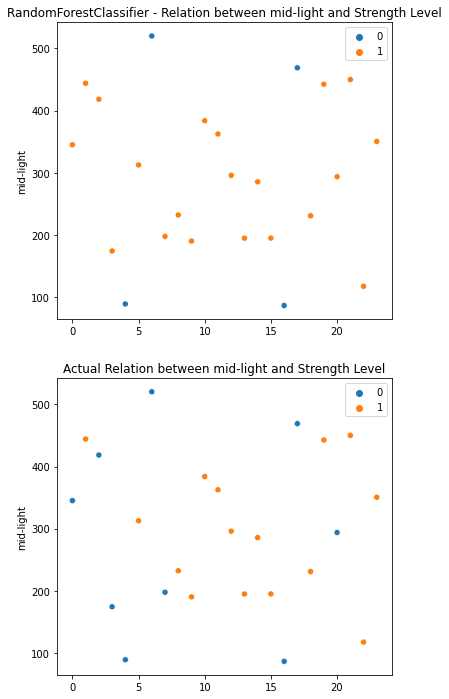

In [30]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
features = ['mid-light']
label = ['digitize_strength_level']
calculate_feature_importance(clf, features, label, model_name='RandomForestClassifier')

Now, I have tested **right-light** sensor feature as an input.

 Trained model can predict strength level of the input feature with **83.33%** accuracy.

From the graph, we can see that **if the right-light sensor value is smaller than approximately 150 then model can predict that the person’s strength level is normal, otherwise the strength level is weak.**


Accuracy score is 0.8333333333333334
              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.87      0.87      0.87        15

    accuracy                           0.83        24
   macro avg       0.82      0.82      0.82        24
weighted avg       0.83      0.83      0.83        24



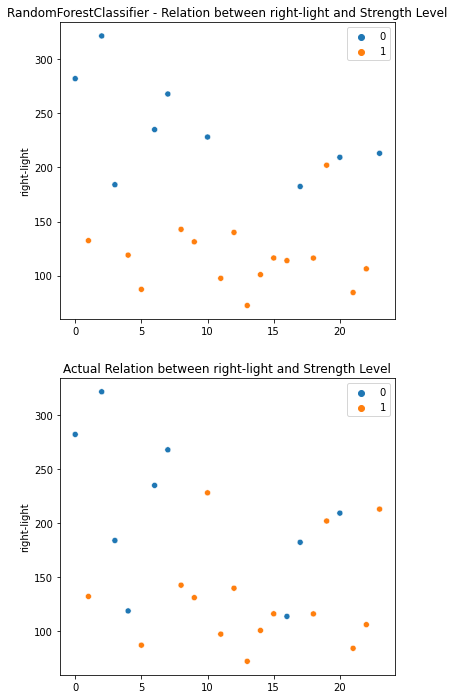

In [31]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
features = ['right-light']
label = ['digitize_strength_level']
calculate_feature_importance(clf, features, label, model_name='RandomForestClassifier')

# Model Performance on more features

In [48]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

def calculate_features(model, features, label, cv=10, model_name='LogisticRegression'):
  X = data[features].values
  y = data[label].values

  cvs = cross_val_score(model, X, y, scoring="accuracy", cv = cv)
  print('Accuracy: %.3f (%.3f)' % (mean(cvs), std(cvs)))
  
  fig, axs = plt.subplots(2, figsize=(6, 12))
  x_ax = list(range(0, len(X)))
  # print(X.shape)
  sns.barplot([(mean(cvs) * 100)], ax=axs[0])
  sns.barplot([std(cvs)], ax=axs[1])


  axs[0].set_title(f"{model_name} - MEAN Accuracy (%)")
  axs[0].set_ylabel(f'{model_name}')
  axs[0].set_xlabel(f'Accuracy')
  
  axs[1].set_title(f"{model_name} - STD Accuracy")
  axs[1].set_ylabel(f'{model_name}')
  axs[1].set_xlabel(f'Accuracy')
  
  plt.show()

In first experiment, I have used 4 features as an input - **left-light, mid-light, right-light and age**.


The model average accuracy is **76.7%** at this time. 


Accuracy: 0.767 (0.238)


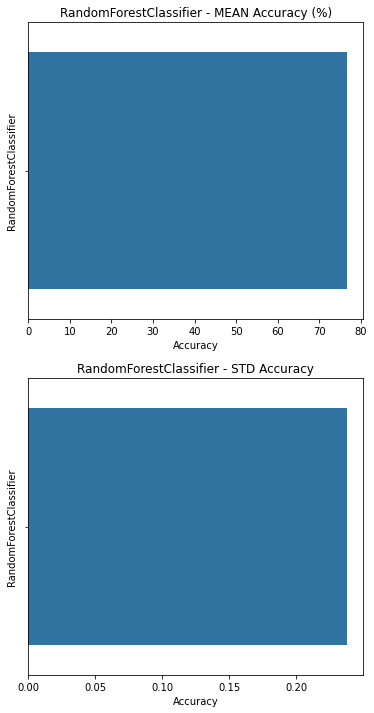

In [49]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
features = ['left-light', 'mid-light', 'right-light', 'age']
label = ['digitize_strength_level']
calculate_features(clf, features, label, model_name='RandomForestClassifier')

In this experiment, I have used 5 features as an input - **left-light, mid-light, right-light, age and hand-size**.

The model accuracy is **85%** at this time. 

So, using more features can increase model performance of RandomForestClassifier model.



Accuracy: 0.850 (0.229)


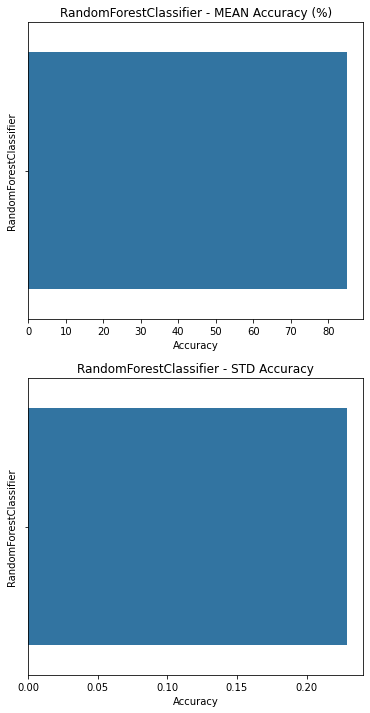

In [50]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
features = ['left-light', 'mid-light', 'right-light', 'age', 'hand-size']
label = ['digitize_strength_level']
calculate_features(clf, features, label, model_name='RandomForestClassifier')

In this experiment, I have used 6 features as an input - **left-light, mid-light, right-light, age, hand-size and gender**.

The model accuracy is **81.7%** at this time. 

So, it means that not every additional features can increase the accuracy. Using *gender* features affected decrease the performance of RandomForestClassifier model.


Accuracy: 0.817 (0.229)


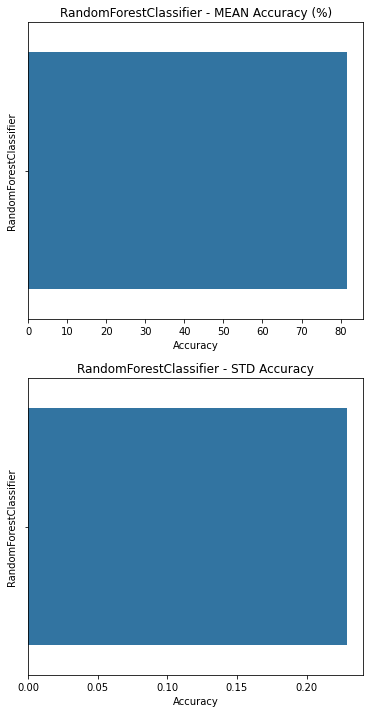

In [51]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
features = ['left-light', 'mid-light', 'right-light', 'age', 'hand-size', 'digitize_gender']
label = ['digitize_strength_level']
calculate_features(clf, features, label, model_name='RandomForestClassifier')